<a href="https://colab.research.google.com/github/bmondal98/fraud_transaction_detection/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
df=pd.read_csv("/content/drive/MyDrive/csv/Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# shape of the dataframe
df.shape

(6362620, 11)

In [6]:
#gettign the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#column details
#step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
#type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
#amount - amount of the transaction in local currency.
#nameOrig - customer who started the transaction
#oldbalanceOrg - initial balance before the transaction
#newbalanceOrig - new balance after the transaction
#nameDest - customer who is the recipient of the transaction
#oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
#newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

#isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims
#    to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

#isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. 
#     An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [9]:
#checking unique value of is FlaggedFraud
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
#checking unique value of isFraud
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
#getting the rows which have fraud value 1
df[(df['isFraud']==1) & (df['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [12]:
#checking nan/missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#count type wise
df['type'].value_counts()


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
#separting the fraud and normal transactions
normalDf=df[df['isFraud']==0].copy()
fraudDf=df[df['isFraud']==1].copy()

In [15]:
# printing statistical data for normal and fraud transactions
normalDf.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [16]:
fraudDf.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [17]:
# taking random 8213 samples from normal transactions, to compare with 8213 fraud samples, because the fraud and normal samples are not equally distributed
normalDf_sample=normalDf.sample(n=8213)

In [18]:
normalDf_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
116743,11,CASH_IN,15719.36,C382801496,100585.00,116304.36,C757176724,0.00,0.00,0,0
6064925,505,PAYMENT,1037.86,C1693375141,133.00,0.00,M225187498,0.00,0.00,0,0
5584214,394,PAYMENT,24086.27,C49448222,2091.72,0.00,M1603322078,0.00,0.00,0,0
1729366,160,TRANSFER,213996.01,C1899531430,0.00,0.00,C537562802,4292120.55,4506116.56,0,0
1225695,133,PAYMENT,5045.43,C1693332127,0.00,0.00,M110361760,0.00,0.00,0,0


In [19]:
#generating a new dataframe by adding the fraud and normal transaction data to perform our next steps
modified_df=pd.concat([normalDf_sample,fraudDf], axis=0)

In [20]:
modified_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
116743,11,CASH_IN,15719.36,C382801496,100585.00,116304.36,C757176724,0.00,0.00,0,0
6064925,505,PAYMENT,1037.86,C1693375141,133.00,0.00,M225187498,0.00,0.00,0,0
5584214,394,PAYMENT,24086.27,C49448222,2091.72,0.00,M1603322078,0.00,0.00,0,0
1729366,160,TRANSFER,213996.01,C1899531430,0.00,0.00,C537562802,4292120.55,4506116.56,0,0
1225695,133,PAYMENT,5045.43,C1693332127,0.00,0.00,M110361760,0.00,0.00,0,0


In [21]:
#checking form last rows to know fraud datas are present or not, if not then we have to modify the concatenation
modified_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [22]:
#ploting the amount hsitograms and boxplots

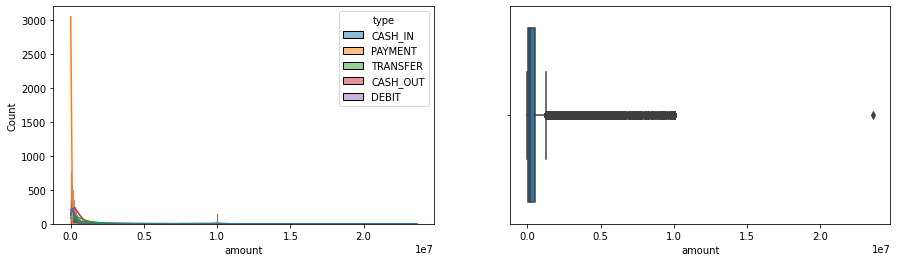

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data=modified_df, hue='type', x="amount",kde=True, ax=ax1)
sns.boxplot(x='amount', data=modified_df, ax=ax2)
plt.show()

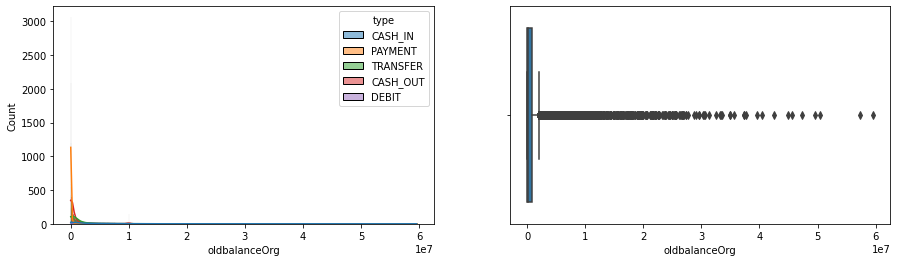

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data=modified_df, hue='type', x="oldbalanceOrg",kde=True, ax=ax1)
sns.boxplot(x='oldbalanceOrg', data=modified_df, ax=ax2)
plt.show()

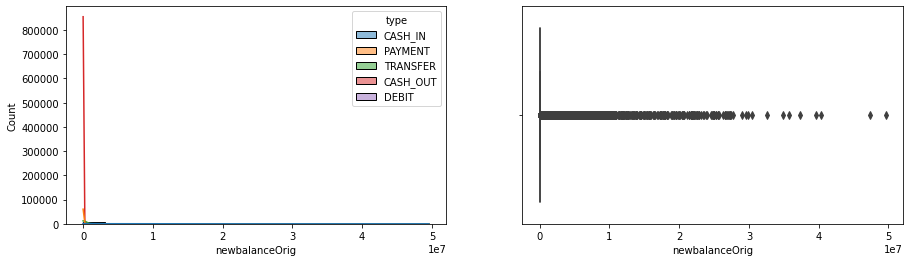

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data=modified_df, hue='type', x="newbalanceOrig",kde=True, ax=ax1)
sns.boxplot(x='newbalanceOrig', data=modified_df, ax=ax2)
plt.show()

In [26]:
# lets keep the amount outliers , because it's financial data it will be useful to train and validate the model

In [27]:
def get_statistical_data_upper_lower_limit(col_df,check_zscore,zscore_limit_val,check_percentile, percentile_limit_val):
  print("-----statistical values------\n")
  print("  ")
  print("Mean value of amount",col_df.mean())
  print("  ")
  print("Median value of amount",col_df.median())
  print("  ")
  print("Standard deviation of amount",col_df.std())
  print("  ")
  print("Minimum value of amount",col_df.min())
  print("  ")
  print("Maximum value of amount",col_df.max())
  print("  ")
  print('---skewness---',col_df.skew())
  print("  ")
  if check_zscore:

    zscore_upper_limit = col_df.mean() + zscore_limit_val[1]*col_df.std()
    zscore_lower_limit = col_df.mean() - zscore_limit_val[0]*col_df.std()
    
    print("  ")
    print('---- zscore val upper and lower -----')
    print("  ")
    print('upper limit by zscore --- ', zscore_upper_limit)
    print("  ")
    print('lower limit by zscore --- ', zscore_lower_limit)
    print("  ")

  if check_percentile:
    lower_percentile = np.percentile(col_df, percentile_limit_val[0])
    upper_percentile = np.percentile(col_df, percentile_limit_val[1])

    print("  ")
    print('---- percentile val {0}th and {1}th -----'.format(percentile_limit_val[0], percentile_limit_val[1]))
    print("  ")
    print('lower percentile val --- ', lower_percentile)
    print("  ")
    print('upper percentile val --- ', upper_percentile)

In [28]:
get_statistical_data_upper_lower_limit(modified_df['amount'],True,[3,3],True,[10,90])

-----statistical values------

  
Mean value of amount 822369.0697272617
  
Median value of amount 172712.1
  
Standard deviation of amount 1855114.213914867
  
Minimum value of amount 0.0
  
Maximum value of amount 23620926.94
  
---skewness--- 3.645532472178725
  
  
---- zscore val upper and lower -----
  
upper limit by zscore ---  6387711.711471862
  
lower limit by zscore ---  -4742973.572017339
  
  
---- percentile val 10th and 90th -----
  
lower percentile val ---  8220.82
  
upper percentile val ---  2119407.6


In [29]:
# keeping the outliers, because since its fraud detection the outlier amount will be useful for us to train and validate the model

In [30]:
#shuffling the modified df because we concatenated normal with fraud transactions, so, they are in order, if we shuffled then it will randomly placed
# fraud and normal data in any index
modified_df = modified_df.sample(frac=1).reset_index(drop=True)

In [31]:
modified_df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
16421,334,CASH_IN,502570.57,C1484629454,3771698.82,4274269.38,C1041245139,2418904.11,1916333.54,0,0
16422,130,PAYMENT,4023.97,C926246860,8620.00,4596.03,M1643710913,0.00,0.00,0,0
16423,315,TRANSFER,82648.30,C11779770,82648.30,0.00,C478014939,0.00,0.00,1,0
16424,7,TRANSFER,441445.58,C1023505879,441445.58,0.00,C847761155,0.00,0.00,1,0
16425,570,CASH_OUT,232148.38,C2057344948,26538.00,0.00,C965713057,884123.04,1116271.42,0,0


In [32]:
# performing one hot encoding on type column
type_transact_dummies = pd.get_dummies(modified_df['type'], drop_first=True)
type_transact_dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
16421,0,0,0,0
16422,0,0,1,0
16423,0,0,0,1
16424,0,0,0,1


In [33]:
#concatenating one hot encoded columns with modified df
modified_df=pd.concat([modified_df, type_transact_dummies], axis=1)
modified_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,256,CASH_OUT,42184.65,C1952343527,0.00,0.0,C126569931,67956.73,110141.38,0,0,1,0,0,0
1,689,TRANSFER,2163012.63,C94303206,2163012.63,0.0,C1258619985,0.00,0.00,1,0,0,0,0,1
2,373,CASH_OUT,152314.49,C1045010197,152314.49,0.0,C1827976569,144953.35,297267.84,1,0,1,0,0,0
3,42,CASH_OUT,75189.30,C106094127,0.00,0.0,C1433665167,83553.00,79441.66,0,0,1,0,0,0
4,740,CASH_OUT,748139.48,C959562247,748139.48,0.0,C1768725891,0.00,748139.48,1,0,1,0,0,0


In [34]:
#droping some columns and separating feature values and target values
X=modified_df.drop(['step','type','nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)
Y=modified_df['isFraud']

In [35]:
X.head(2)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,42184.65,0.00,0.0,67956.73,110141.38,1,0,0,0
1,2163012.63,2163012.63,0.0,0.00,0.00,0,0,0,1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
Lregr=LogisticRegression()

In [39]:
Lregr.fit(x_train,y_train)

LogisticRegression()

In [40]:
from sklearn import metrics
y_pred=Lregr.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8283627510651248